# ENIAC 2018

## Influence of Location and Number of Landmarks on the Monte Carlo Localization Problem
This main notebook contains the necessary codes to do the analyses and the graphics, presented in the article.
All the output images will be also stored inside the images folder.

First, let's import the necessary packages:

In [1]:
# Guarantee a clean session for it
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import dill
import sys
sys.path.append("../")

# My packages
from simulated_annealing import SimulatedAnnealing
from mcl import MCL
from map import Map
from helpers import *

dill.dump_session("saved_sessions/import.db")

### Figure 3 and Figure 4

Do the performance analyses of Monte Carlo Localization in function of landmarks.

Hit rate, $E_G$ on article, at left. Average time to first hit, $F_G$ on article, at right.

- To Figure 3 use: `n = 10` (Default)
- To Figure 4 use: `n = 25` (Very Slow)

In [2]:
# Guarantee a clean session for it
%reset -f
import dill
dill.load_session("saved_sessions/import.db")

n = 10

avg_hit_rate = np.zeros(int((n*n+1)/2), dtype=np.float)
number_of_landmarks = np.fromiter(range(1, n * n + 1, 2), dtype=np.int8)
avg_first_hit = np.zeros(int((n*n+1)/2), dtype=np.float)
r = 2000
map_ = Map.random(n, 1)
mcl = MCL(map_)
index = 0
for index, p in enumerate(number_of_landmarks):
    for i in range(100):
        hits = 0
        mcl.map = Map.random(n, p)
        for j in range(r):
            mcl.simulate_movement(mcl.move())
            mcl.sense(mcl.simulate_sensor())
            if mcl.real_position == mcl.estimated_position:
                hits += 1
                if hits == 1:
                    avg_first_hit[index] += j + 1
        avg_hit_rate[index] += hits / r

    avg_first_hit[index] /= 100
    avg_hit_rate[index] /= 100

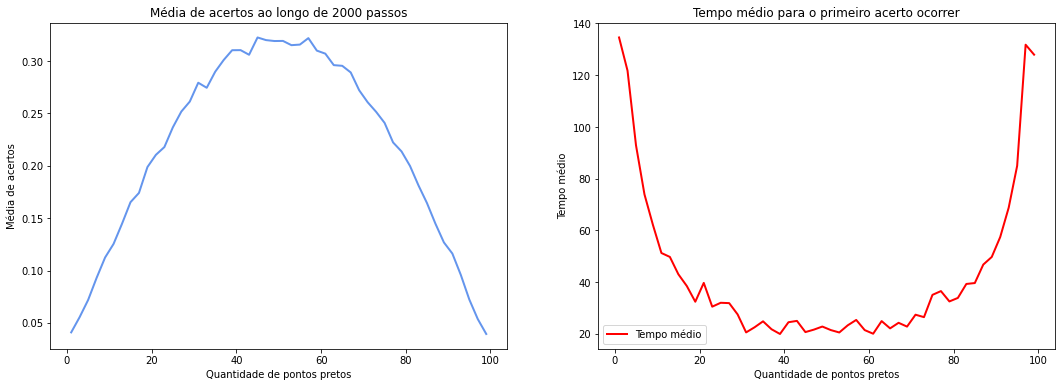

In [3]:
fig = plt.figure('', figsize=(18, 6))
plt.subplot(121)
plt.title('Média de acertos ao longo de 2000 passos')
plt.xlabel('Quantidade de pontos pretos')
plt.ylabel('Média de acertos')
plt.plot(number_of_landmarks, avg_hit_rate, color='cornflowerblue', linewidth=2, label='Média de acertos')

plt.subplot(122)
plt.title('Tempo médio para o primeiro acerto ocorrer')
plt.xlabel('Quantidade de pontos pretos')
plt.ylabel('Tempo médio')
plt.plot(number_of_landmarks, avg_first_hit, color='red', linewidth=2, label='Tempo médio')

plt.legend()
plt.show()
if n == 10:
    fig.savefig('images/Figure3.png')
if n == 25:
    fig.savefig('images/Figure4.png')

In [4]:
# Todo: Figura 5. Evolução da probabilidade dada pelo MCL para a real posição do robô ao longo do tempo, para n = 10,
#  e duas quantidades de pontos de referência, p = 1 e p = 50.

### Figure 7

Do the histogram with 1000 samples of $E_G$ with $r = 2000$ of a fixed landmarks configuration.

The average is highlighted in red, average and standard deviation is printed.

In [5]:
# Guarantee a clean session for it
%reset -f
import dill
dill.load_session("saved_sessions/import.db")

map_ = Map.random(size=10, number_of_landmarks=50, border=False)
mcl = MCL(map_)
samples = 1000  # Should be 1000

analyses = np.fromiter((avg_hit_rate(mcl) for i in range(samples)), np.float)

avg = np.sum(analyses) / samples
errors = analyses - avg
variance = np.sum(np.multiply(errors, errors)) / samples
avg, variance ** 0.5

(0.26266650500000005, 0.0032513293450487286)

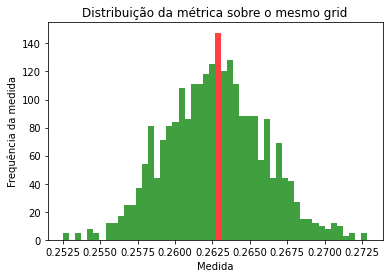

In [6]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

fig = plt.figure()
plt.title('Distribuição da métrica sobre o mesmo grid')
n, bins, patches = plt.hist(analyses, 50, density=True, facecolor='g', alpha=0.75)
patches[find_nearest(bins, avg)].set_fc('r')
plt.xlabel('Medida')
plt.ylabel('Frequência da medida')
plt.show()
fig.savefig('images/Figure7.png')

### Figure 8 and Figure 9

Best hit rate, $E_G$ on article, found in function of number of simulated annealing transitions, at left.

Transitions rejections as determined by Metropolis-Hasting in function of simulated annealing transitions, at right.

- To Figure 8 use: `random = False (default)`.
- To Figure 9 use: `random = True`.

In [7]:
# Guarantee a clean session for it
%reset -f
import dill
dill.load_session("saved_sessions/import.db")

random = False
map_ = Map.striped(10)
mcl = MCL(map_)
def f():
    return avg_hit_rate(mcl)
sim = SimulatedAnnealing(map_, f)
transitions = 100
transitions_vec = [i for i in range(transitions)]

# The draw flag indicates if each map should be drawn during optimization
# Is recommended to change the current path before saving lots of fig.
sim.map.get_image().save('images/Figure6_initial.png')
max_value, rejections = sim.optimize(transitions=transitions, draw=False)

sim.best.get_image().save('images/Figure6_best.png')

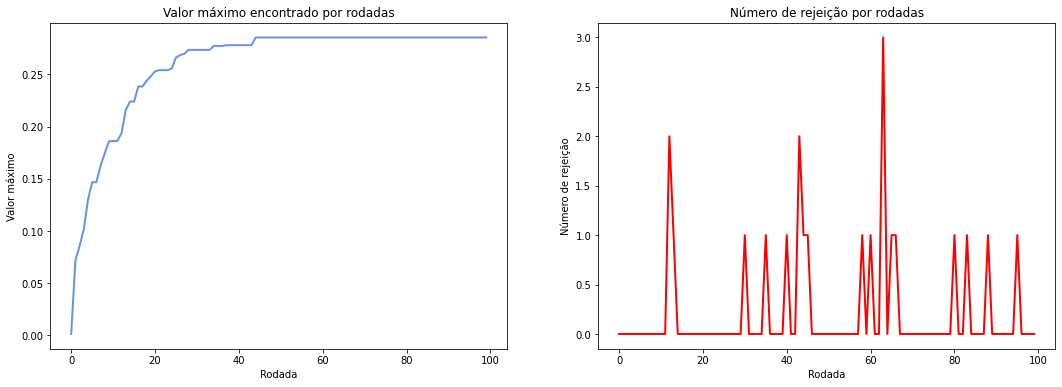

In [8]:
fig = plt.figure('SimulatedAnnealinglated Annealing', figsize=(18, 6))

plt.subplot(121)
plt.title('Valor máximo encontrado por rodadas')
plt.xlabel('Rodada')
plt.ylabel('Valor máximo')
plt.plot(transitions_vec, max_value, color='cornflowerblue', linewidth=2, label='Valor máximo')

plt.subplot(122)
plt.title('Número de rejeição por rodadas')
plt.xlabel('Rodada')
plt.ylabel('Número de rejeição')
plt.plot(transitions_vec, rejections, color='red', linewidth=2, label='Número de rejeição')

plt.show()
if random:
    fig.savefig('images/Figure8.png')
else:
    fig.savefig('images/Figure9.png')